<a href="https://colab.research.google.com/github/NarasimhanN/Recommendation-System/blob/main/Course_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE RECOMMENDATION SYSTEM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting Data 

In [3]:
datasetPath = "/content/drive/MyDrive/IIIT B/RS/Course Recommendation System(1-162).xlsx"
rs_data = pd.read_excel(datasetPath)
rs_data

,ID,Start time,Completion time,Email,Name,Name(not mandatory)\n,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,6,2023-01-30 14:04:19,2023-01-30 14:05:54,anonymous,NaN,NaN,0.30,0.85,0.85,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,7,2023-01-30 14:04:44,2023-01-30 14:12:35,anonymous,NaN,Rahul Jain,0.70,0.80,0.20,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,8,2023-01-30 14:11:07,2023-01-30 14:12:47,anonymous,NaN,NaN,0.70,0.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,9,2023-01-30 19:10:54,2023-01-30 19:12:35,anonymous,NaN,Adrij Sharma,0.65,0.70,0.20,0.75,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,10,2023-01-30 22:58:02,2023-01-30 23:00:34,anonymous,NaN,NaN,0.70,0.60,0.20,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,163,2023-02-25 09:36:58,2023-02-25 09:39:26,anonymous,NaN,Shivankar Pilligundla,0.00,1.00,0.50,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,164,2023-02-25 10:32:07,2023-02-25 10:33:29,anonymous,NaN,NaN,1.00,0.00,0.00,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,165,2023-02-25 16:23:18,2023-02-25 16:25:04,anonymous,NaN,NaN,0.60,0.30,0.40,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,166,2023-02-27 09:46:02,2023-02-27 09:46:57,anonymous,NaN,NaN,0.80,0.60,0.20,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cols_to_delete = {'ID',	'Start time','Completion time',	'Email',	'Name',	'Name(not mandatory)\n'}
rs_data.drop(columns=cols_to_delete,inplace=True)

In [5]:
rs_data 

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,NaN,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataPreprocessing 

In [6]:
rs_data_final = rs_data.fillna(0.5)

In [7]:
rs_data_final

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.50,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.8,0.5,0.5,0.8,0.5
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.50,0.5,0.7,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


## Coding KMeans

In [8]:
# columns={'Course1','Course2','Course3','Course4','Course5'}
# dataa = pd.DataFrame(np.random.randint(101,size=(250,5))/10,columns=columns)
# dataa = rs_data_final[:-10].copy()
# dataa_test = rs_data_final[-10:].copy()
dataa = rs_data_final.copy()
k=6
clusters = []


In [9]:
dataa

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.50,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.8,0.5,0.5,0.8,0.5
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.50,0.5,0.7,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [10]:
def init():
  '''1)Initialising K Clusters from the first k datapoints with the 5 core courses
     2)Assigning Random clusters to each datapoint '''
  for i in range(k):
    clusters.append(np.array(dataa.iloc[i][:5]))

  print("--------------------------------------------")
  print("No of Clusters : ",len(clusters))
 # print("## LOG : init : Final Clusters : ",clusters)

  initial_clusters = np.random.randint(0,k,len(dataa))
  dataa['cluster'] = initial_clusters

def findLoss(centroid,data):
  sum=0
  for i in range(len(centroid)):
    sum+=(centroid[i]-data[i])**2
  return sum

def assignCentroid(data):
  i=0
  MIN=999999999
  for cnumber in range(k):
    #print("## LOG : assignCentroid : Centroid No : ",cnumber)
    centroid = clusters[cnumber]
    current_loss=findLoss(centroid,data)
    #print("## LOG : assignCentroid : Loss : ",current_loss)
    if(current_loss<MIN):
      data['cluster']=i
      MIN=current_loss

    i=i+1
  print("##--------------------LOG INFO : assignCentroid : Assigned Cluster : ",data['cluster'])
  return data

def findCentroid(cluster_set):
  centroid = list()
  for i in cluster_set:
    centroid.append(cluster_set[i].mean())
  return centroid[:5]

def kMeans():
  iteration = 0
  while True:
    print("\n\n\n*************************************************************************** Iteration :",iteration)
    centroids_before = dataa['cluster'].copy()
    for i in range(len(dataa)):
      print("\n---------------------------------------------------------- \n#### LOG : KMeans : Data point No :",i," | Iteraton : ",iteration)
      dataa.iloc[i]=assignCentroid(dataa.iloc[i])
    centroids_after = dataa['cluster']
    if(sum(centroids_after == centroids_before)==len(dataa)):
      print("## LOG : KMeans : Exiting as Convergence Achiced  | Iterration : ",iteration)
      break # Convergence

    #Update Cluster Centroids
    for cnumber in range(k):
      print("\n^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ \n#### LOG : KMenas : Updating Centroid - Centroid Number : ",cnumber)
      print("## LOG : KMeans : Before : ",clusters[cnumber])
      clusters[cnumber]=findCentroid(dataa[dataa['cluster']==cnumber])
      print("## LOG : KMeans : After : ",clusters[cnumber])
    iteration+=1



In [11]:
init()
dataa

--------------------------------------------
No of Clusters :  6


,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind,cluster
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.50,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5,1
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,3
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5,5
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.5,0.5,...,0.5,0.5,0.5,0.5,0.8,0.5,0.5,0.8,0.5,2
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2,1
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,1.0,3
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.50,0.5,0.7,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0


In [12]:
# centroid = list()
# cluster_set = dataa[dataa['cluster']==1]
# # for i in cluster_set:
# #   centroid.append(cluster_set[i].mean())
# # centroid[:5]
# cluster_set.mean()[:5]

In [13]:
clusters

[array([0.3 , 0.85, 0.85, 0.9 , 0.7 ]),
 array([0.7, 0.8, 0.2, 0.8, 0.8]),
 array([0.7, 0. , 1. , 1. , 1. ]),
 array([0.65, 0.7 , 0.2 , 0.75, 0.75]),
 array([0.7, 0.6, 0.2, 0. , 0.8]),
 array([0.8, 0.9, 0.6, 0.7, 0.7])]

In [14]:
kMeans()




*************************************************************************** Iteration : 0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 0  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  0.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 1  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  1.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 2  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  2.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 3  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  3.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 4  | Iteraton :  0
##--------------------LOG INFO 

<ipython-input-10-b0ba2dbff2ea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=i




---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 51  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  5.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 52  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  5.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 53  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  5.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 54  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  5.0

---------------------------------------------------------- 
#### LOG : KMeans : Data point No : 55  | Iteraton :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  1.0

-------------------------------------------

In [15]:
# clusters

## Make Recommendation Table

In [16]:
print("   Total Data Samples : ",len(dataa))
for i in range(k):
  print("Cluster No : ",i," | No of Samples : ",sum(dataa['cluster']==i))

   Total Data Samples :  162
Cluster No :  0  | No of Samples :  12
Cluster No :  1  | No of Samples :  16
Cluster No :  2  | No of Samples :  12
Cluster No :  3  | No of Samples :  19
Cluster No :  4  | No of Samples :  24
Cluster No :  5  | No of Samples :  79


In [17]:
rec_tab_data=[]

rec_table_cols = dataa.columns[5:-1]

for cnumber in range(k):
  cluster_set = dataa[dataa['cluster']==cnumber]
  res=[]
  for i in cluster_set:
    res.append(cluster_set[i].mean())
  rec_tab_data.append(res[5:-1])

In [18]:
rec_tab = pd.DataFrame(data=rec_tab_data,columns=rec_table_cols)
rec_tab

,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,Software Production Engineering\n,Computer Graphics\n,Data Visualization\n,Programming Languages\n,Cloud Computing\n,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.626046,0.606882,0.515215,0.556545,0.621046,0.633333,0.451989,0.646049,0.600000,0.563627,0.391667,0.383333,0.375000,0.375000,0.391667,0.375000,0.537639,0.483333,0.508333,0.575000
1,0.812500,0.640625,0.659375,0.575000,0.581250,0.650000,0.463125,0.556250,0.400000,0.537500,0.375000,0.437500,0.418750,0.387500,0.343750,0.493750,0.568750,0.500000,0.568750,0.500000
2,0.858333,0.850000,0.658333,0.533333,0.600000,0.533333,0.383333,0.416667,0.525000,0.466667,0.258333,0.175000,0.175000,0.258333,0.175000,0.220833,0.366667,0.350000,0.291667,0.391667
3,0.721053,0.552632,0.500000,0.442105,0.452632,0.600000,0.507895,0.536842,0.457895,0.589474,0.389474,0.389474,0.400000,0.384211,0.389474,0.547368,0.544737,0.531579,0.552632,0.663158
4,0.772917,0.616667,0.560417,0.493333,0.553750,0.689583,0.414583,0.443750,0.608333,0.541667,0.295833,0.245833,0.237500,0.254167,0.216667,0.266667,0.366667,0.379167,0.275000,0.379167
5,0.782152,0.759747,0.619114,0.577215,0.573418,0.598734,0.495570,0.598101,0.540506,0.543671,0.421772,0.439494,0.410633,0.425949,0.407595,0.451899,0.468101,0.486456,0.475316,0.513291


## Testing : 

In [19]:
def recommendTopX(test_data,top_X_courses): 
  '''For Training Data'''
  cluster_no  = int(assignCentroid(test_data)['cluster'])
  return rec_tab.iloc[cluster_no].sort_values(ascending=False)[:top_X_courses]

In [20]:
# def assignCentroidTest(data):
#   i=0
#   MIN=999999999
#   cluster_no=-1
#   for cnumber in range(len(clusters)):
#     print("## LOG : assignCentroid : Centroid No : ",cnumber)
#     centroid = clusters[cnumber]
#     current_loss=findLoss(centroid,data)
#     print("## LOG : assignCentroid : Loss : ",current_loss)
#     if(current_loss<MIN):
#       cluster_no = i
#       MIN=current_loss

#     i=i+1
#   print("##--------------------LOG INFO : assignCentroid : Assigned Cluster : ",cluster_no)
#   return cluster_no

# def recommendTopXTest(test_data,top_X_courses):
#   ''' For Testing Data with no Cluster Attribute'''
#   cluster_no  = assignCentroidTest(test_data)
#   return rec_tab.iloc[cluster_no].sort_values(ascending=False)[:top_X_courses]

# # test_data = dataa_test.iloc[-1]
# # print(test_data)
# # recommendTopXTest(test_data,4)

In [21]:
# test_data[5:].sort_values(ascending=False)

In [22]:
test_data = dataa.iloc[10]
print(test_data)
result = recommendTopX(test_data,3)
print("\n\n\n--------------Top Courses  :\n\n",result)

Data Structures and Algorithms                                0.70
Computer Architecture\n                                       0.80
Discrete Mathematics\n                                        0.85
Economics                                                     0.50
Programming-2                                                 1.00
Machine Learning\n                                            0.70
Mathematics For Machine Learning\n                            0.75
Visual Recognition\n                                          0.50
Natural Language Processing\n                                 0.50
Reinforcement Learning                                        0.50
Software Production Engineering\n                             0.50
Computer Graphics\n                                           0.50
Data Visualization\n                                          0.50
Programming Languages\n                                       0.50
Cloud Computing\n                                             

<ipython-input-10-b0ba2dbff2ea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=i


In [23]:
test_data[5:-1].sort_values(ascending=False).unique()

array([0.75, 0.7 , 0.5 , 0.3 ])

In [24]:
def evaluateInersectionOfSubjects(actual_subjects,predicted_subjects):
  count=0
  common_subs=list()
  for sub in actual_subjects:
    if sub in predicted_subjects:
      count+=1
      common_subs.append(sub)
  return common_subs,count

def validateResults(actual_data,topX):
  result = recommendTopX(actual_data,topX)
  print(" TOP ",topX," Subjects are : \n",result.sort_values(ascending=False))
  predicted_subjects = result.index
  print(" \n Predicted Subjects : \n",predicted_subjects)

  unique_vals = actual_data[5:-1].sort_values(ascending=False).unique()
  print("\n----------------Unique Values of ACtual Data : \n",unique_vals)
  print("\n---------------------\nActual Data Electives : \n",actual_data[5:-1].sort_values(ascending=False))

  if topX>len(unique_vals):
    actual_subjects = actual_data.index
  else:
    threshold = unique_vals[topX-1]
    print(" threshold : ",threshold)
    actual_subjects = actual_data[5:-1].where(lambda x : x>=threshold).dropna().index
  print("\n--------------\n Actual Subjects to Evaluate : \n",actual_subjects)
  print("\n\n Size of Actual Subjects to Evaluate : ",len(actual_subjects))

  common_subs,count = evaluateInersectionOfSubjects(actual_subjects,predicted_subjects)
  print("\n-------------------- Common Subjects : \n",common_subs)
  print("\n Count : ",count)
  accuracy = count/topX*100
  print("\n Accuracy : ",accuracy,"%")
  return accuracy
    
  

In [25]:
topXSubjects=5
accuracy_list=list()
for i in range(len(dataa)):
  print("\n********************************************\n data point : ",i)
  accuracy_list.append(int(validateResults(dataa.iloc[i],topXSubjects)))


********************************************
 data point :  0
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  0.0
 TOP  5  Subjects are : 
 Data Visualization\n                  0.646049
Software Production Engineering\n     0.633333
Machine Learning\n                    0.626046
Reinforcement Learning                0.621046
Mathematics For Machine Learning\n    0.606882
Name: 0, dtype: float64
 
 Predicted Subjects : 
 Index(['Data Visualization\n', 'Software Production Engineering\n',
       'Machine Learning\n', 'Reinforcement Learning',
       'Mathematics For Machine Learning\n'],
      dtype='object')

----------------Unique Values of ACtual Data : 
 [0.8 0.7 0.6 0.5]

---------------------
Actual Data Electives : 
 Mathematics For Machine Learning\n                            0.8
Machine Learning\n                                            0.7
Privacy in the Digital Age                                    0.6
Techno-economics of networks                  

<ipython-input-10-b0ba2dbff2ea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=i


Streaming output truncated to the last 5000 lines.
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind ', 'cluster'],
      dtype='object')


 Size of Actual Subjects to Evaluate :  26

-------------------- Common Subjects : 
 ['Machine Learning\n', 'Mathematics For Machine Learning\n', 'Visual Recognition\n', 'Software Production Engineering\n', 'Programming Languages\n']

 Count :  5

 Accuracy :  100.0 %

********************************************
 data point :  90
##--------------------LOG INFO : assignCentroid : Assigned Cluster :  5.0
 TOP  5  Subjects are : 
 Machine Learning\n                    0.782152
Mathematics For Machine Learning\n    0.759747
Visual Recognition\n                  0.619114
Software Production Engineering\n     0.598734
Data Visualization\n                  0.598101
Name: 5, dtype: float64
 
 Predicted Subjects : 
 Index(['Machine Learning\n', 'Mathe

In [26]:
overall_Accuracy = sum(accuracy_list)/len(accuracy_list)
overall_Accuracy

96.66666666666667

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'#Clusters = 6| Top 5 Courses | Overall Accuracy = 96.66666666666667%'}, xlabel='Accuracy', ylabel='count'>

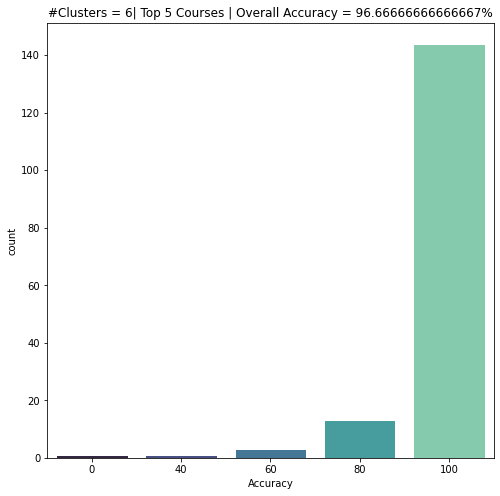

In [27]:
fig, axes = plt.subplots(figsize=(8,8))
sns.set_style(style="darkgrid")
title_str = "#Clusters = "+str(k)+"| Top "+str(topXSubjects)+" Courses | Overall Accuracy = "+str(overall_Accuracy)+"%"
plt.title(title_str)
plt.xlabel("Accuracy")
plt.ylabel("Count")
sns.countplot(accuracy_list,palette="mako")

In [28]:
# testinp = [0]*26
# test_Df = pd.DataFrame(testinp,columns=dataa.columns)
# test_Df

In [29]:
dataa.columns[2]

'Discrete Mathematics\n'

In [30]:
Overall_Accuracy = sum(accuracy_list)/len(accuracy_list)

In [31]:
actual_subjects = test_data[5:-1].where(lambda x : x>0.5).dropna().index


In [32]:
predicted_subjects = result.index


In [33]:
count=0
common_subs=list()
for sub in actual_subjects:
  if sub in predicted_subjects:
    count+=1
    common_subs.append(sub)

In [34]:
common_subs

['Machine Learning\n', 'Mathematics For Machine Learning\n']

In [35]:
count/5*100

40.0

## Sandbox

In [36]:
# x = np.linspace(0, 50, 161)
# y = x ** 2

# fig, axes = plt.subplots(figsize=(8,5))

# axes.plot(x, y, 'r')
# axes.set_xlabel('x')
# axes.set_ylabel('y')
# axes.set_title('title');

In [37]:
cluster_set = dataa[dataa['cluster']==2]
centroid = list()
for i in cluster_set:
  print("---------------\n\n",cluster_set[i])
  centroid.append(cluster_set[i].mean())
print(len(centroid[5:-1]))

---------------

 2      0.7
56     1.0
94     0.8
104    1.0
108    0.0
115    0.0
118    0.8
125    1.0
134    1.0
143    1.0
145    1.0
156    0.7
Name: Data Structures and Algorithms, dtype: float64
---------------

 2      0.0
56     0.0
94     0.3
104    0.0
108    0.0
115    0.0
118    0.1
125    0.3
134    0.0
143    0.0
145    0.2
156    0.1
Name: Computer Architecture\n, dtype: float64
---------------

 2      1.0
56     1.0
94     0.7
104    1.0
108    1.0
115    1.0
118    0.9
125    1.0
134    1.0
143    1.0
145    1.0
156    0.8
Name: Discrete Mathematics\n, dtype: float64
---------------

 2      1.00
56     0.00
94     0.40
104    0.00
108    0.00
115    0.00
118    0.05
125    0.60
134    0.00
143    1.00
145    1.00
156    0.90
Name: Economics, dtype: float64
---------------

 2      1.0
56     1.0
94     0.9
104    1.0
108    1.0
115    1.0
118    0.6
125    0.7
134    1.0
143    1.0
145    1.0
156    0.7
Name: Programming-2, dtype: float64
---------------

 2      1